# 기온예측문제

## DataSet 가져오기

In [1]:
import os

In [33]:
data_dir = ".\\datasets\\jena_climate"
#fname = os.path.join(data_dir, "jena_climate_2009_2016.csv")
fname = os.path.join(data_dir, "jena_climate_2009_2016_short.csv")
fname

'.\\datasets\\jena_climate\\jena_climate_2009_2016_short.csv'

In [34]:
f = open(fname)
data = f.read()
f.close()

In [35]:
lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

In [36]:
print(header)
print(len(lines))
print(lines[0])

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
199585
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30


## 데이터 파싱

In [14]:
import numpy as np

In [37]:
print(len(lines))
print(len(header))
print(np.zeros((len(lines), len(header)-1)))
print(line.split(",")[1:])

199585
15
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['999.82', '-4.82', '268.36', '-8.42', '75.70', '4.27', '3.23', '1.04', '2.01', '3.23', '1296.38', '1.23', '1.96', '184.90']


In [38]:
float_data = np.zeros((len(lines), len(header)-1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    float_data[i, :] = values

In [27]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

## 시계열 온도 그래프 그리기

In [40]:
from matplotlib import pyplot as plt

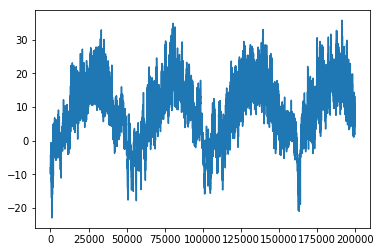

In [41]:
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

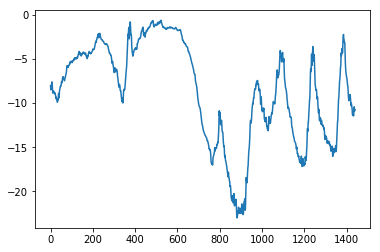

In [42]:
plt.plot(range(1440), temp[:1440])

## 데이터 정규화

In [ ]:
mean = float_data